In [56]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve

from mlxtend.plotting import plot_confusion_matrix

# Execício 1
Crie uma árvore de decisão para o conjunto de dados Statlog Heart Dataset, com profundidade máxima igual a 2. Calcule a precisão e cobertura dos nós terminais da árvore.

## Analisando o Dataset

In [30]:
filepath = Path('datasets', 'statlog-heart-dataset.csv')
df = pd.read_csv(filepath)

(df.head())

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


In [31]:
df.keys()

Index(['age', 'sex', 'chest', 'pressure', 'cholestoral', 'bloodsugar',
       'electrocardiographic', 'heartRate', 'exInducedAngina', 'oldpeak',
       'slope', 'numMajorVessels', 'thal', 'class'],
      dtype='object')

In [33]:
features = df.drop(columns=['class'])
target = df['class']

In [34]:
X = pd.DataFrame(data=features, columns=features.keys())
y = pd.Series(data=target, name='class')

In [35]:
X.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7


In [36]:
y

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
265     no
266     no
267     no
268     no
269     no
Name: class, Length: 270, dtype: object

### Divisão Treino e Teste

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Aplicando o Modelo

In [39]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    random_state=42,
)

(model)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [41]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

acc

0.7037037037037037

In [47]:
matrix = confusion_matrix(y_test, y_pred)

(matrix)

array([[24,  5],
       [11, 14]])

In [49]:
(tn, fp), (fn, tp) = matrix

(tn, fp, fn, tp)

(np.int64(24), np.int64(5), np.int64(11), np.int64(14))

In [52]:
precision, recall, _, support = precision_recall_fscore_support(y_test, y_pred)

In [53]:
print((f'Precisão: {precision}'
       f'Recall: {recall}'
       f'Suporte: {support}'))

Precisão: [0.68571429 0.73684211]Recall: [0.82758621 0.56      ]Suporte: [29 25]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

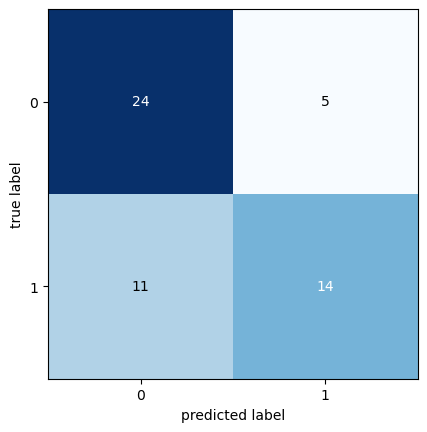

In [46]:
plot_confusion_matrix(matrix)

# Exercício 3
Construa e avalie um modelo usando curva ROC. Qual o limiar de decisão necessário para se obter uma taxa de verdadeiros positivos maior que 0.9?

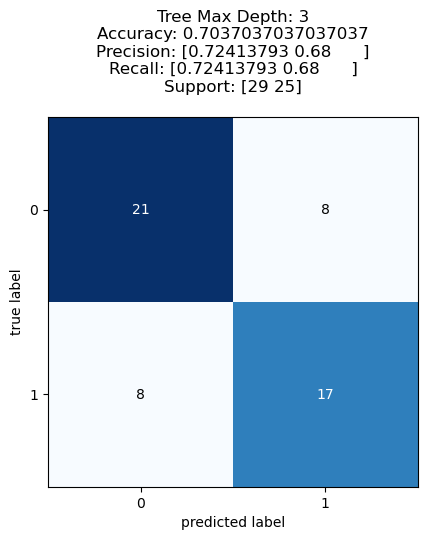

In [78]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state=42,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision, recall, _, support = precision_recall_fscore_support(y_test, y_pred)

report = (f'Tree Max Depth: {3}\n'
            f'Accuracy: {acc}\n'
            f'Precision: {precision}\n'
            f'Recall: {recall}\n'
            f'Support: {support}\n')

matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(matrix)
plt.title(report)
plt.show()

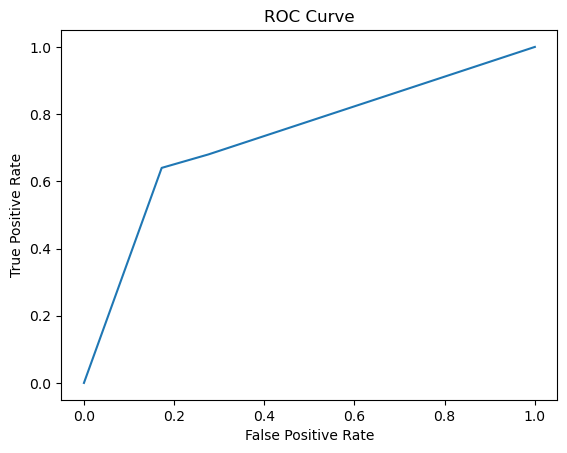

In [79]:
curve = roc_curve(
    y_true=y_test,
    y_score=model.predict_proba(X_test)[:, 1],
    pos_label='yes',
)


plt.plot(curve[0], curve[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()